Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans

Load the Dataset

In [81]:
df = pd.read_csv('/content/sales_data.csv')

Data Exploration and Cleaning

In [82]:
# Display the first few rows of the dataset
print(df.head(5))

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

In [83]:
# Check for missing values
print(df.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [84]:
# Handling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [85]:
# Summary statistics
print(df.describe())

                 Day           Year   Customer_Age  Order_Quantity  \
count  113036.000000  113036.000000  113036.000000   113036.000000   
mean       15.665753    2014.401739      35.919212       11.901660   
std         8.781567       1.272510      11.021936        9.561857   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113036.000000  113036.000000  113036.000000  113036.000000   
mean      267.296366     452.938427     285.051665     469.318695   
std       549.835483     922.071219     453.887443     884.866118   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000    

In [86]:
# Data types of columns
print(df.dtypes)

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object


Data Preprocessing

In [87]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [88]:
df.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


Trend Analysis

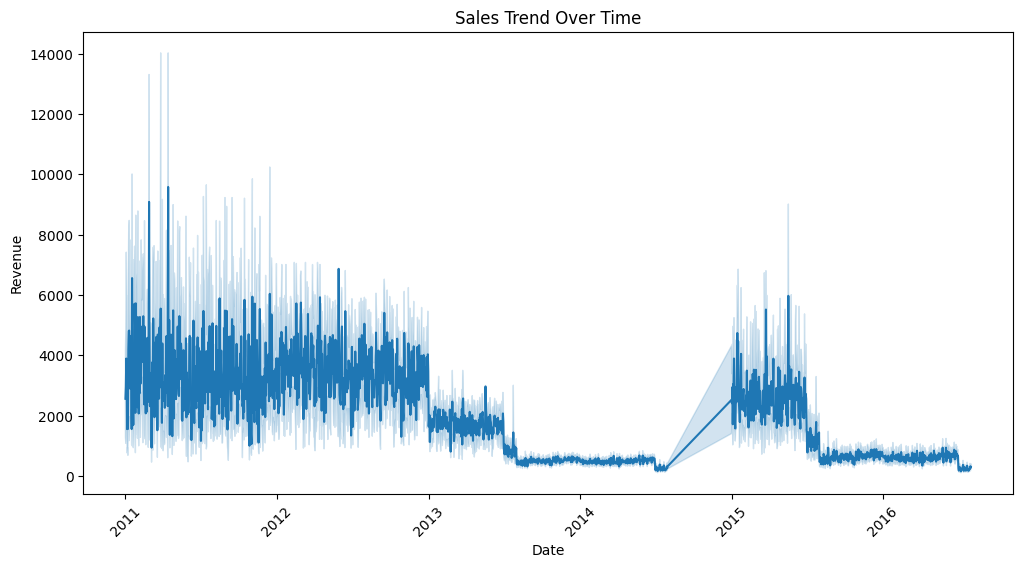

In [89]:
# Plotting sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Revenue', data=df)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

Seasonal Decomposition

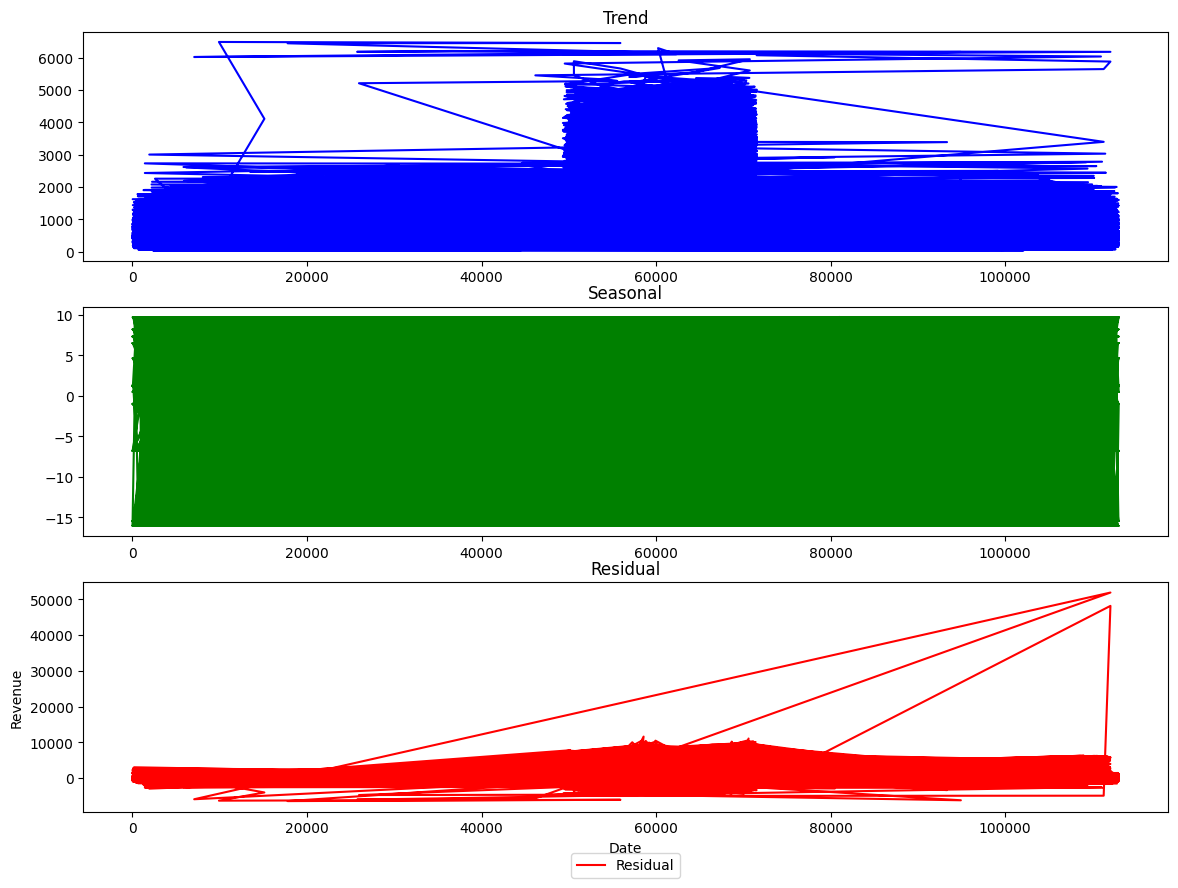

In [90]:
# Ensure the data is sorted by date
df.sort_values('Date', inplace=True)

# Decompose sales data
result = seasonal_decompose(df['Revenue'], model='additive', period=12)

# Individual plot with colors
plt.figure(figsize=(14, 10))

# Trend (blue)
plt.subplot(311)
plt.plot(result.trend, color='blue', label='Trend')
plt.title('Trend')

# Seasonal (green)
plt.subplot(312)
plt.plot(result.seasonal, color='green', label='Seasonal')
plt.title('Seasonal')

# Residual (red)
plt.subplot(313)
plt.plot(result.resid, color='red', label='Residual')
plt.title('Residual')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.subplots_adjust(bottom=0.1)  # Adjust spacing between subplots
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))  # Add legend

plt.show()

Monthly Sales Analysis

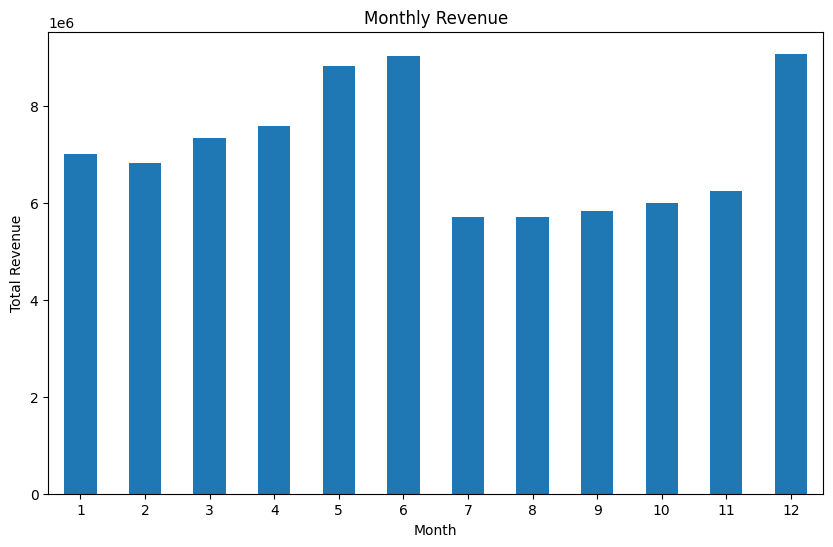

In [91]:
# Group by month and compute total sales
monthly_sales = df.groupby('Month')['Revenue'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

Product Analysis

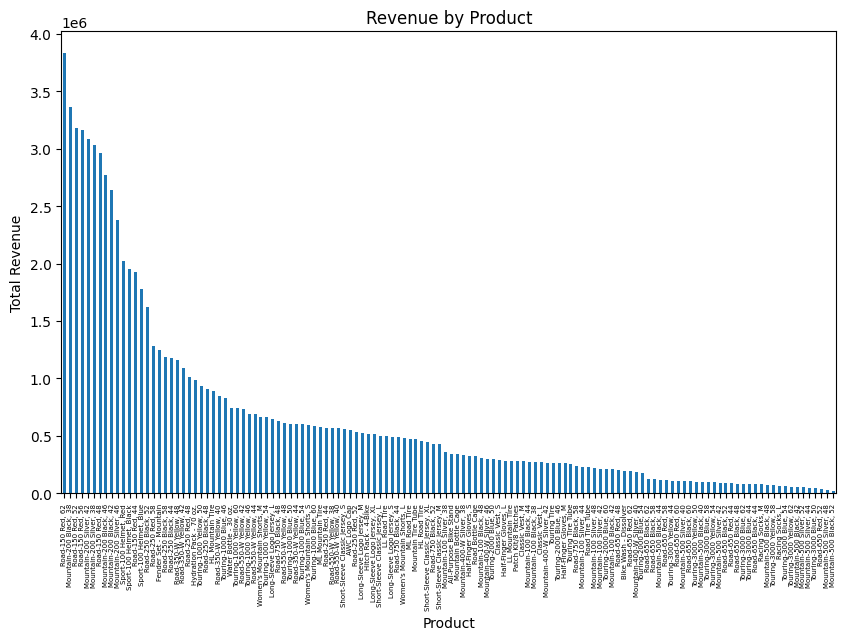

In [92]:
# Group by product category and compute total sales
product_sales = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

# Plot product sales
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90, fontsize=5)
plt.show()

Sales by Region

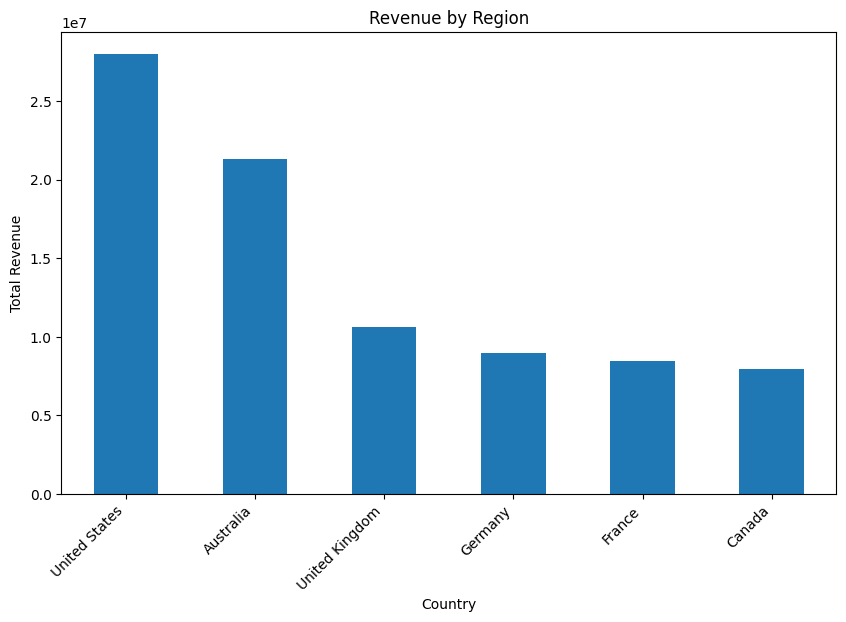

In [93]:
# Group by region and compute total sales
region_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Plot sales by region
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Revenue by Region')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

Customer Segmentation

In [94]:
#RFM Analysis (Recency, Frequency, Monetary)

# Create a composite CustomerID
df['CustomerID'] = df['Customer_Age'].astype(str) + '_' + df['Customer_Gender'] + '_' + df['Country']

# Calculate RFM metrics
current_date = df['Date'].max() + pd.Timedelta(days=1)
rfm_table = df.groupby('CustomerID').agg({
    'Date': lambda x: (current_date - x.max()).days,
    'Order_Quantity': 'count',
    'Revenue': 'sum'
})

# Rename columns
rfm_table.rename(columns={'Date': 'Recency', 'Order_Quantity': 'Frequency', 'Revenue': 'Monetary'}, inplace=True)

# Display RFM table
print(rfm_table)

                     Recency  Frequency  Monetary
CustomerID                                       
17_F_Australia            42        120     87009
17_F_Canada               10         48     27664
17_F_France               31         52     22930
17_F_Germany              40         38     29136
17_F_United Kingdom       22         54     16823
...                      ...        ...       ...
85_M_Germany             253          6      1057
85_M_United Kingdom       24         10       348
86_F_France              308          4       111
86_M_Germany             149          4      4106
87_F_Germany             164          6       552

[647 rows x 3 columns]


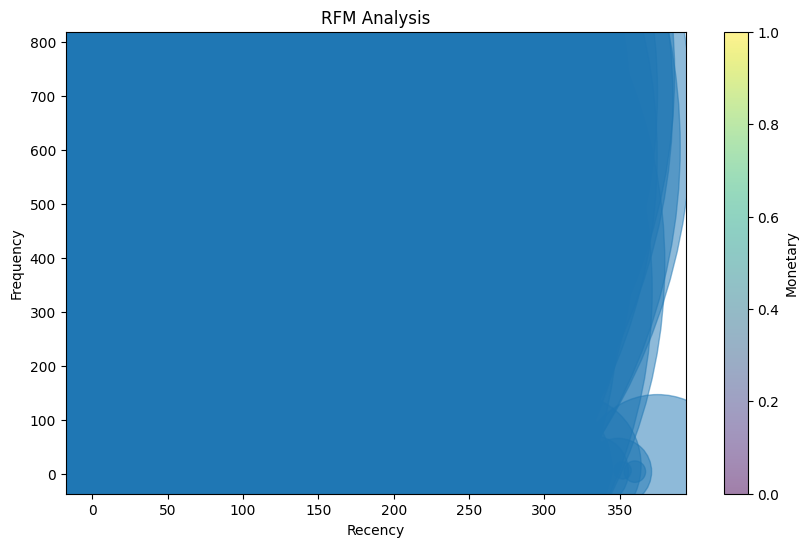

In [95]:
# Plotting RFM analysis
plt.figure(figsize=(10, 6))
plt.scatter(rfm_table['Recency'], rfm_table['Frequency'], s=rfm_table['Monetary'], alpha=0.5)
plt.title('RFM Analysis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.colorbar(label='Monetary')
plt.show()